Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [1]:
%matplotlib inline

import nsfg
preg = nsfg.ReadFemPreg()

Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [6]:
import thinkstats2
live = preg.loc[preg.outcome == 1]
cdf = thinkstats2.Cdf(live.totalwgt_lb)
cdf

Cdf([  0.125    0.3125   0.4375   0.5625   0.625    0.9375   1.       1.0625
   1.125    1.1875   1.25     1.3125   1.375    1.4375   1.5      1.5625
   1.625    1.6875   1.75     1.8125   1.875    2.       2.0625   2.125
   2.1875   2.25     2.3125   2.375    2.4375   2.5      2.5625   2.6875
   2.75     2.8125   2.875    2.9375   3.       3.0625   3.125    3.25
   3.3125   3.375    3.4375   3.5      3.5625   3.625    3.6875   3.75
   3.8125   3.875    3.9375   4.       4.0625   4.125    4.1875   4.25
   4.3125   4.375    4.4375   4.5      4.5625   4.625    4.6875   4.75
   4.8125   4.875    4.9375   5.       5.0625   5.125    5.1875   5.25
   5.3125   5.375    5.4375   5.5      5.5625   5.625    5.6875   5.75
   5.8125   5.875    5.9375   6.       6.0625   6.125    6.1875   6.25
   6.3125   6.375    6.4375   6.5      6.5625   6.625    6.6875   6.75
   6.8125   6.875    6.9375   7.       7.0625   7.125    7.1875   7.25
   7.3125   7.375    7.4375   7.5      7.5625   7.625    7.6875   

Display the CDF.

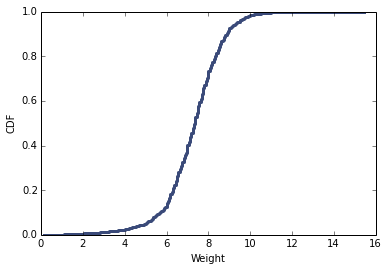

In [9]:
import thinkplot
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Weight', ylabel='CDF')

Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [10]:
cdf.Prob(8)

0.73323744191192741

If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [14]:
firsts = live[live.birthord == 1]
other = live[live.birthord != 1]
thinkstats2.Cdf(firsts.totalwgt_lb).Prob(8)

0.75681870272748109

Compute the percentile rank of your birthweight

In [11]:
cdf.Prob(8) * 100

73.323744191192745

Compute the median birth weight by looking up the value associated with p=0.5.

In [15]:
cdf.Value(0.5)

7.375

Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [17]:
cdf.ValueArray([0.25, 0.75])

array([ 6.5  ,  8.125])

Make a random selection from <tt>cdf</tt>.

In [20]:
import random
cdf.Value(random.random())

7.0625

Draw a random sample from <tt>cdf</tt>.

In [31]:
sample = cdf.Sample(1000)
sample

array([  8.5   ,   6.875 ,   6.5   ,   7.3125,   8.    ,   4.75  ,
         8.75  ,   7.4375,  10.0625,   8.    ,   7.6875,   6.875 ,
         7.375 ,   6.6875,   8.9375,   7.75  ,   6.3125,   7.5   ,
         6.6875,   7.375 ,   7.0625,   4.625 ,   8.    ,   7.1875,
         5.8125,   6.3125,   8.625 ,   8.    ,   7.3125,   7.6875,
         6.5   ,   6.75  ,   7.8125,   7.6875,   7.625 ,   7.5   ,
         6.8125,  11.9375,   8.0625,   6.4375,   7.    ,   7.375 ,
         6.375 ,   8.8125,   6.3125,   6.3125,   8.1875,   7.    ,
        12.375 ,   7.6875,   6.    ,   7.875 ,   7.6875,   6.625 ,
         8.8125,   7.125 ,   7.6875,   7.9375,   8.0625,   5.    ,
         7.125 ,   4.0625,   8.625 ,   7.1875,   6.75  ,   7.8125,
         8.8125,  10.5   ,   1.625 ,   6.    ,   7.3125,   7.9375,
         8.8125,   5.25  ,   8.375 ,   7.8125,   7.3125,   6.125 ,
         6.25  ,   7.25  ,   6.125 ,   8.25  ,  11.125 ,   6.75  ,
         6.6875,   5.125 ,   6.25  ,   7.0625,   7.    ,   6.5

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

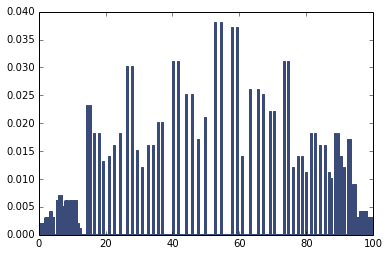

In [32]:
ranks = [cdf.PercentileRank(it) for it in sample]
ranks_pmf = thinkstats2.Pmf(ranks)
thinkplot.Pmf(ranks_pmf)
thinkplot.Show()

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

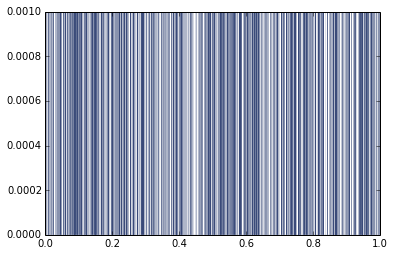

In [50]:
rs = [random.random() for _ in range(0, 1000)]
rs_pmf = thinkstats2.Pmf(rs)
thinkplot.Pmf(rs_pmf, linewidth=0.1)
thinkplot.Show()

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

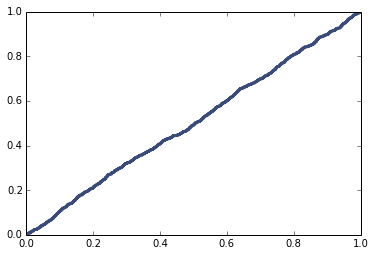

In [51]:
rs_cdf = thinkstats2.Cdf(rs)
thinkplot.Cdf(rs_cdf)
thinkplot.Show()

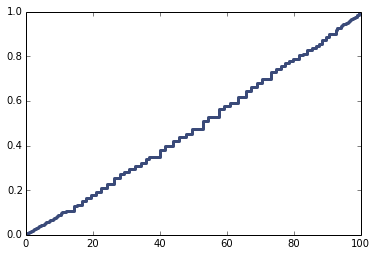

In [49]:
ranks_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(ranks_cdf)
thinkplot.Show()

0.5